### Matrix 정리
$ X == (N,D) $  
$ W_1 == (D,H) $  
$ b_1 == (H,) $  
$ H == (N,H) $  
$ A == (N,H) $  
$ W_2 == (H,C) $  
$ b_2 == (C,) $  
$ S == (N,C) $  
$ P == (N,C) $  

### Matrix 미분 정리  
$ H = XW + b\qquad  (N, H) = (N, D) \times (D, H) + (H,) $  


$ L = f(H) $  


$ {\partial L \over \partial W} = X^T {\partial L \over \partial H} = {\partial H \over \partial W} \times {\partial L \over \partial H}$  


$ {\partial L \over \partial X} = {\partial L \over \partial H} W^T = {\partial L \over \partial H} \times {\partial H \over \partial X}$  


$ {\partial L \over \partial b} = 1*{\partial L \over \partial H}  $  

### 2 Layers Chain Rule 정리
$ H = XW_1 + b_1$  

$ A = ReLU(H) $  

$ S = AW_2 + b_2 $  

$ P = Softmax(S) $    

$ L = -LogLikelihood(P) $  

$ {\partial L \over \partial S} = P - T $ : T는 Label  

$ {\partial L \over \partial W_2} = {\partial S \over \partial W_2}{\partial L \over \partial S} = A^T (P-T) $  

$ {\partial L \over \partial b_2} = 1 * {\partial L \over \partial S} = P-T $  

$ {\partial L \over \partial A} = {\partial L \over \partial S}{\partial S \over \partial A} = (P-T)W_2^T $  

$ {\partial L \over \partial H} = (A>0) * {\partial L \over \partial A} $  

$ {\partial L \over \partial W_1} = {\partial H \over \partial W_1}{\partial L \over \partial H} = X^T {\partial L \over \partial H}  $  

$ {\partial L \over \partial b_1} = 1 * {\partial L \over \partial H} = {\partial L \over \partial H} $  

### Softmax - Cross Entropy Error미분  
<img src="img/fig a-5.png">

### 데이터 Load  
cifar-10 데이터를 불러옵니다.  
프레임워크 내 자체적으로 데이터를 로드할 수 있지만, 
이렇게도 데이터 로드가 가능합니다!  
32  32  3 차원의 데이터를 3072 차원으로 바뀌는 것 까지 드릴게요.

In [1]:
from load_cifar_10 import *
import numpy as np
from Model import TwoLayerNet

In [2]:
cifar_10_dir = 'cifar-10-batches-py'

train_data, train_filenames, train_labels, test_data, test_filenames, test_labels, label_names = \
load_cifar_10_data(cifar_10_dir)

def Processing_data(train, test):
    #change dtype
    train = np.array(train, dtype=np.float64)
    test = np.array(test, dtype=np.float64)
    
    #Reshaping
    train = np.reshape(train, (train.shape[0], -1))
    test = np.reshape(test, (test.shape[0], -1))
    
    #Normalizing
    mean_image = np.mean(train, axis = 0)
    #print(train.dtype)
    train -= mean_image
    test -= mean_image
    
    return train, test

In [3]:
train_data, test_data = Processing_data(train_data, test_data)

In [4]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(50000, 3072)
(50000,)
(10000, 3072)
(10000,)


너무 많으니까 5000개, 1000개만 사용합시다!

In [5]:
train_data = train_data[:5000]
train_labels = train_labels[:5000]
test_data = test_data[:1000]
test_labels = test_labels[:1000]

### 데이터 확인  
실제 데이터가 어떻게 생겼는지는 한번 확인해보세요!

In [6]:
train_data.shape, train_labels.shape

((5000, 3072), (5000,))

### 하이퍼파라미터 설정  
하이퍼파라미터를 설정하겠습니다.  
hidden_size, epoch_size, batch_size, learning_rate 등은 전부 하이퍼 파라미터이니 바꿔서 해보세요.

In [7]:
input_size = 32 * 32 * 3
hidden_size = 50
output_size = 10
epoch_size = 1000
batch_size = 100
learning_rate = 0.002
N = train_data.shape[0]

### 모델 만들기  
input_size, hidden_size, output_size는 데이터에 맞게 잘 설정해주세요.

In [8]:
nn = TwoLayerNet(input_size=input_size, hidden_size=hidden_size, output_size=output_size)

In [9]:
history = {'acc': [],'loss': []} #기록해서 그림 그리자!

#코드를 보며 epoch, batch에 대해서 이해해봅시다.
for i in range(epoch_size):
    for j in range(N//batch_size):
        batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
        x_batch = train_data[batch_mask]
        t_batch = train_labels[batch_mask]
        
        nn.backward(x_batch, t_batch) # 가중치 갱신
    
    #accuracy와 loss를 기록해둡시다.
    history["acc"].append(nn.accuracy(test_data, test_labels))
    history["loss"].append(nn.forward(test_data, test_labels))
    
    if i % 10 == 0:
        print(i, "accuracy :", nn.accuracy(test_data, test_labels))
        print(i, "loss     :", nn.forward(test_data, test_labels))

0 accuracy : 0.091
0 loss     : 2.3025758128693035
10 accuracy : 0.181
10 loss     : 2.302407182890155
20 accuracy : 0.197
20 loss     : 2.3018904906488986
30 accuracy : 0.194
30 loss     : 2.2997848157301606
40 accuracy : 0.182
40 loss     : 2.291551537344615
50 accuracy : 0.179
50 loss     : 2.2656778377192417
60 accuracy : 0.202
60 loss     : 2.2234153537394454
70 accuracy : 0.217
70 loss     : 2.179448364624426
80 accuracy : 0.227
80 loss     : 2.135036144212913
90 accuracy : 0.247
90 loss     : 2.097352573786885
100 accuracy : 0.257
100 loss     : 2.0698488853284975
110 accuracy : 0.257
110 loss     : 2.0477725538458147
120 accuracy : 0.258
120 loss     : 2.0295140744971722
130 accuracy : 0.27
130 loss     : 2.012557263247997
140 accuracy : 0.275
140 loss     : 1.995637289950131
150 accuracy : 0.273
150 loss     : 1.9791712821877618
160 accuracy : 0.28
160 loss     : 1.9626432960793718
170 accuracy : 0.282
170 loss     : 1.9470914701129984
180 accuracy : 0.294
180 loss     : 1.932

### 그림 그리기

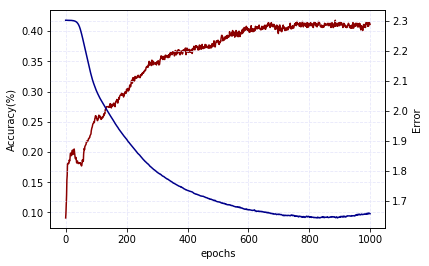

In [10]:
fig = plt.figure()
ax_acc = fig.add_subplot(111)

ax_acc.plot(range(epoch_size), history['acc'], label='정확도(%)', color='darkred')
#plt.text(3, 14.7, "<----------------정확도(%)", verticalalignment='top', horizontalalignment='right')
plt.xlabel('epochs')
plt.ylabel('Accuracy(%)')
ax_acc.grid(linestyle='--', color='lavender')
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epoch_size), history['loss'], label='오차', color='darkblue')
#plt.text(3, 2.2, "<----------------오차", verticalalignment='top', horizontalalignment='left')
plt.ylabel('Error')
ax_loss.yaxis.tick_right()
ax_loss.grid(linestyle='--', color='lavender')

# 그래프 표시
plt.show()